In [1]:
import csv, collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2014.csv',usecols=[3,7,10,14,15,16,17,29,30,35])
        

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.columns

Index(['Facility ID', 'Gender', 'Length of Stay', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'Attending Provider License Number',
       'Operating Provider License Number', 'Total Charges'],
      dtype='object')

In [4]:
#remove dollar sign
data['Total Charges'] = data['Total Charges'].str.lstrip('$').astype(float)

In [5]:
sorted(pd.unique(data['CCS Procedure Description']))

['ABDOMINAL PARACENTESIS',
 'ABORTION (TERM OF PREG)',
 'ALCO/DRUG REHAB/DETOX',
 'AMPUTATE LOWER EXTRMITY',
 'AORTIC RESECTION; REPL',
 'APPENDECTOMY',
 'ART RUPT MEMB ASSIS DLV',
 'ARTERIAL BLOOD GASES',
 'ARTERIO FEMORAL/LOW ART',
 'ARTERIO/VENOGRAM-NOT HH',
 'ARTERIOVENOUS FISTULA',
 'ARTHROCENTESIS',
 'ARTHROPLASTY KNEE',
 'ARTHROPLASTY-NOT HIP/KN',
 'ARTHROSCOPY',
 'BIOPSY OF LIVER',
 'BLOOD TRANSFUSION',
 'BONE MARROW BIOPSY',
 'BONE MARROW TRANSPLANT',
 'BREAST BIOPSY & DX PRCS',
 'BUNIONECTOMY/TOE DEFORM',
 'CANCER CHEMOTHERAPY',
 'CARDIAC PACEMAKER/DEFIB',
 'CARDIAC STRESS TESTS',
 'CEREBRAL ARTERIOGRAM',
 'CESAREAN SECTION',
 'CHOLECYSTECTOMY/EXPLOR',
 'CIRCUMCISION',
 'COLONOSCOPY AND BIOPSY',
 'COLORECTAL RESECTION',
 'COLOSTOMY; TEMP/PERM',
 'COMP AXIAL TOMOGR (CT)',
 'CONTRAST AORTOGRAM',
 'CONTROL OF EPISTAXIS',
 'CONV OF CARDIAC RHYTHM',
 'COR ARTERY BYP GRF-CABG',
 'CORNEAL TRANSPLANT',
 'CORONARY THROMBOLYSIS',
 'CT SCAN ABDOMEN',
 'CT SCAN CHEST',
 'D&C; ASPIR AFT D

In [6]:
proccodes = {(code,desc) for (code,desc) in data.loc[:,('CCS Procedure Code', 'CCS Procedure Description')].values}

In [7]:
diagcodes = {(code,desc) for (code,desc) in data.loc[:,('CCS Diagnosis Code', 'CCS Diagnosis Description')].values}

In [8]:
proccodes

{(0, 'NO PROC'),
 (1, 'INCISION & EXCISION CNS'),
 (2, 'IRR XCRANIAL VENT SHUNT'),
 (3, 'LAMINECTOMY; EXC IV DSC'),
 (4, 'DIAGNOSTIC SPINAL TAP'),
 (5, 'INS CATHETER/SPNL STIM'),
 (6, 'DECOMP PERIPHERAL NERVE'),
 (7, 'OTHER DX NERV SYS PRCS'),
 (8, 'OT NON-OR THER NERV SYS'),
 (9, 'OTHER OR THER NERV SYS'),
 (10, 'THYROIDECTOMY;PART/FULL'),
 (11, 'DX ENDOCRINE PRCS'),
 (12, 'OT THER ENDOCRINE PRCS'),
 (13, 'CORNEAL TRANSPLANT'),
 (14, 'GLAUCOMA PROCEDURES'),
 (15, 'LENS & CATARACT PRCS'),
 (16, 'REPAIR RETINAL TEAR'),
 (17, 'DES LES RETINA/CHOROID'),
 (18, 'DX PRCS ON EYE'),
 (19, 'OT THER PRCS EYELIDS'),
 (20, 'OT INTRAOCULAR THER PRC'),
 (21, 'OT EXTRAOCULAR MUSC/ORB'),
 (22, 'TYMPANOPLASTY'),
 (23, 'MYRINGOTOMY'),
 (24, 'MASTOIDECTOMY'),
 (25, 'DX PRCS ON EAR'),
 (26, 'OT THERAPEUTIC EAR PRCS'),
 (27, 'CONTROL OF EPISTAXIS'),
 (28, 'PLASTIC PRCS ON NOSE'),
 (29, 'ORAL AND DENTAL SVCS'),
 (30, 'TONSIL-/ADENOID-ECTOMY'),
 (31, 'DX PRCS ON NOSE & MOUTH'),
 (32, 'OT NON-OR THER PRC NOSE

In [6]:
P = 44  #proc number we're interested in

In [7]:
procrows = data[data['CCS Procedure Description'] == 'COR ARTERY BYP GRF-CABG']
len(procrows)

8054

(0.0, 1000000.0)

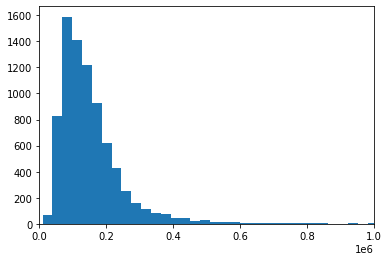

In [16]:
plt.hist(procrows['Total Charges'],bins=100);
plt.xlim(0,1000000)

In [12]:
procrows['Total Charges'].mean()

129958.25

In [8]:
procrows.groupby('CCS Diagnosis Description').count()

,Facility ID,Gender,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,CCS Procedure Description,Attending Provider License Number,Operating Provider License Number,Total Charges
CCS Diagnosis Description,,,,,,,,,
Acute cerebrovascular disease,1,1,1,1,1,1,1,1,1
Acute myocardial infarction,2176,2176,2176,2176,2176,2176,2176,2176,2176
Aortic; peripheral; and visceral artery aneurysms,5,5,5,5,5,5,5,5,5
Cardiac and circulatory congenital anomalies,8,8,8,8,8,8,8,8,8
Cardiac arrest and ventricular fibrillation,3,3,3,3,3,3,3,3,3
Cardiac dysrhythmias,16,16,16,16,16,16,16,16,16
Complication of device; implant or graft,138,138,138,138,138,138,138,138,138
Complications of surgical procedures or medical care,11,11,11,11,11,11,11,11,11
Conduction disorders,3,3,3,3,3,3,3,3,3


In [9]:
diagcnts = procrows['CCS Diagnosis Description'].value_counts()
diagcnts

Coronary atherosclerosis and other heart disease                                                                      5527
Acute myocardial infarction                                                                                           2176
Complication of device; implant or graft                                                                               138
Heart valve disorders                                                                                                   69
Congestive heart failure; nonhypertensive                                                                               52
Cardiac dysrhythmias                                                                                                    16
Complications of surgical procedures or medical care                                                                    11
Hypertension with complications and secondary hypertension                                                              10
Septicemia (exce

In [17]:
D = diagcnts.index[0] # the code is the row name
D

'Coronary atherosclerosis and other heart disease'

In [18]:
diagrows = data[data['CCS Diagnosis Description'] == D]
diagrows

,Facility ID,Gender,Length of Stay,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,Attending Provider License Number,Operating Provider License Number,Total Charges
212,39.0,M,1,101,Coronary atherosclerosis and other heart disease,0,NO PROC,247087.0,NaN,4505.75
390,39.0,M,1,101,Coronary atherosclerosis and other heart disease,0,NO PROC,228729.0,NaN,3274.50
872,39.0,M,1,101,Coronary atherosclerosis and other heart disease,0,NO PROC,247087.0,NaN,9479.50
929,39.0,F,2,101,Coronary atherosclerosis and other heart disease,0,NO PROC,173875.0,NaN,8405.75
1362,39.0,F,1,101,Coronary atherosclerosis and other heart disease,0,NO PROC,247087.0,NaN,13118.50
...,...,...,...,...,...,...,...,...,...,...
2366977,943.0,M,3,101,Coronary atherosclerosis and other heart disease,47,DX CARDIAC CATHETERIZTN,228341.0,239578.0,52515.00
2367012,943.0,M,2,101,Coronary atherosclerosis and other heart disease,47,DX CARDIAC CATHETERIZTN,267443.0,155796.0,37407.00
2367058,943.0,M,1,101,Coronary atherosclerosis and other heart disease,0,NO PROC,244672.0,NaN,17835.00
2367173,943.0,M,2,101,Coronary atherosclerosis and other heart disease,45,PERC TRANSLUM COR ANGIO,225308.0,204473.0,76080.00


In [21]:
len(diagrows[diagrows['CCS Procedure Description'] == 'COR ARTERY BYP GRF-CABG'])/len(diagrows)

0.17388705364165488

In [15]:
#let's calculate average cost per facility
aves = procrows.loc[:,('Facility ID','Total Charges')].groupby('Facility ID').mean()
aves

,Total Charges
Facility ID,
1.0,198625.894312
5.0,131122.243960
42.0,103294.160000
58.0,90416.858456
116.0,111960.450968
181.0,95723.307431
207.0,106681.926523
213.0,93686.326865
245.0,174490.749517


In [16]:
procrows = procrows.copy()
procrows['Length of Stay'] = pd.to_numeric(procrows['Length of Stay'],errors='coerce')

In [17]:
procrows.dropna(inplace=True)

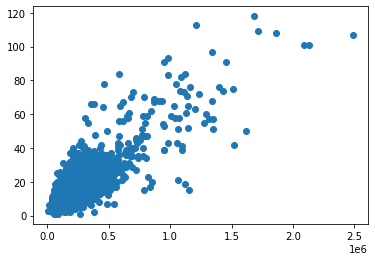

In [18]:
plt.scatter(procrows['Total Charges'],procrows['Length of Stay'])

In [19]:
np.corrcoef(procrows['Total Charges'],procrows['Length of Stay'])

array([[1.        , 0.82539704],
       [0.82539704, 1.        ]])

(array([3., 3., 7., 3., 5., 2., 4., 3., 3., 5., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 62800.14012346,  79795.9896019 ,  96791.83908034, 113787.68855878,
        130783.53803723, 147779.38751567, 164775.23699411, 181771.08647255,
        198766.935951  , 215762.78542944, 232758.63490788, 249754.48438632,
        266750.33386477, 283746.18334321, 300742.03282165, 317737.88230009,
        334733.73177854, 351729.58125698, 368725.43073542, 385721.28021386,
        402717.12969231]),
 <BarContainer object of 20 artists>)

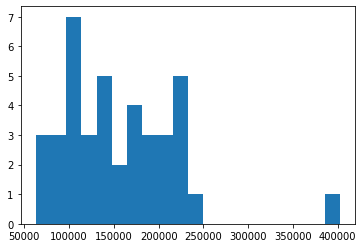

In [20]:
plt.hist(aves.values,bins=20)

In [21]:
avesorted = aves.sort_values(by='Total Charges')
avesorted

,Total Charges
Facility ID,
413.0,62800.140123
598.0,75595.456685
411.0,77422.781115
58.0,90416.858456
213.0,93686.326865
181.0,95723.307431
630.0,99145.165204
746.0,100537.818545
42.0,103294.160000


In [22]:
tenth = int(len(avesorted)/10)
top10 = avesorted.iloc[-tenth:]
bottom10 = avesorted.iloc[:tenth]

In [23]:
top10

,Total Charges
Facility ID,
1464.0,222194.882297
511.0,223725.744466
925.0,233040.663554
1139.0,402717.129692


In [24]:
topprocs = procrows[procrows['Facility ID'].isin(top10.index) & (procrows['CCS Diagnosis Description'] == D)]
bottomprocs = procrows[procrows['Facility ID'].isin(bottom10.index) & (procrows['CCS Diagnosis Description'] == D)]

topdiags = diagrows[diagrows['Facility ID'].isin(top10.index)]
bottomdiags = diagrows[diagrows['Facility ID'].isin(bottom10.index)]

In [25]:
len(topprocs)/float(len(topdiags))

0.2144010332579916

In [26]:
len(bottomprocs)/float(len(bottomdiags))

0.43330980945659847

In [27]:
topdiags['CCS Procedure Description'].value_counts()/len(topdiags)

PERC TRANSLUM COR ANGIO    0.438812
DX CARDIAC CATHETERIZTN    0.231837
COR ARTERY BYP GRF-CABG    0.214401
NO PROC                    0.040685
CARDIAC STRESS TESTS       0.015499
DX ULTRASOUND HEART        0.009687
CARDIAC PACEMAKER/DEFIB    0.007427
OT NON-OR THER CARDIO      0.006781
OTHER OR HEART PRCS        0.004521
OT OR PRCS VES NOT HEAD    0.003875
OT DX PRC (INTERVW,EVAL    0.003229
OT ORGAN TRANSPLANTATN     0.002906
CT SCAN CHEST              0.002906
HEMODIALYSIS               0.002260
PROPHYLACTIC VAC/INOCUL    0.001614
RADIOISOTOPE SCAN/FUNCT    0.001292
OTHER THERAPEUTIC PRCS     0.001292
HEART VALVE PRCS           0.001292
ARTERIO/VENOGRAM-NOT HH    0.001292
OT DX RADIO & RELATED      0.000969
ELECTROGR CARDIAC MONIT    0.000969
BLOOD TRANSFUSION          0.000646
OTHER RESP THERAPY         0.000646
EXTRA CIRC AUX OPEN HRT    0.000646
TRACHEOSTOMY; TEMP/PERM    0.000646
COMP AXIAL TOMOGR (CT)     0.000646
RESP INTUB/MECH VENTIL     0.000646
AMPUTATE LOWER EXTRMITY    0

In [28]:
bottomdiags['CCS Procedure Description'].value_counts()/len(bottomdiags)

COR ARTERY BYP GRF-CABG    0.433310
PERC TRANSLUM COR ANGIO    0.287932
DX CARDIAC CATHETERIZTN    0.167255
NO PROC                    0.057869
CARDIAC PACEMAKER/DEFIB    0.013409
BLOOD TRANSFUSION          0.004234
OTHER OR HEART PRCS        0.003529
OT DX PRC (INTERVW,EVAL    0.003529
HEMODIALYSIS               0.002823
DX ULTRASOUND HEART        0.002117
HEART VALVE PRCS           0.002117
ARTERIO/VENOGRAM-NOT HH    0.002117
OTHER THERAPEUTIC PRCS     0.002117
CARDIAC STRESS TESTS       0.001411
OT NON-OR THER PRC SKIN    0.001411
CONV OF CARDIAC RHYTHM     0.001411
OT NON-OR THER CARDIO      0.001411
RESP INTUB/MECH VENTIL     0.001411
PROPHYLACTIC VAC/INOCUL    0.001411
INCISION OF PLEURA         0.001411
UP GASTRO ENDOSC/BIOPSY    0.000706
RADIOISOTOPE SCAN/FUNCT    0.000706
ENDARTERECTOMY;VES HEAD    0.000706
ELECTROENCEPHALOGRAM       0.000706
EMBOL-/ENDARTER-ECTOMY     0.000706
OT THER PRCS; HEM/LYMPH    0.000706
REPAIR CYST-/RECT-OCELE    0.000706
MAG RESONANCE IMAGING      0

Train a predictive model for cost.

In [29]:
X = procrows.drop(['Total Charges'],axis=1)
Y = procrows['Total Charges']

In [30]:
import sklearn
from sklearn import tree, ensemble,preprocessing, feature_extraction

In [31]:
X_dict = list(X.astype(np.str).T.to_dict().values())

/tmp/ipykernel_77385/2150187472.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_dict = list(X.astype(np.str).T.to_dict().values())


In [32]:
X_dict

[{'Facility ID': '207.0',
  'Gender': 'M',
  'Length of Stay': '8.0',
  'CCS Diagnosis Code': '100',
  'CCS Diagnosis Description': 'Acute myocardial infarction',
  'CCS Procedure Code': '44',
  'CCS Procedure Description': 'COR ARTERY BYP GRF-CABG',
  'Attending Provider License Number': '252406.0',
  'Operating Provider License Number': '164499.0'},
 {'Facility ID': '207.0',
  'Gender': 'M',
  'Length of Stay': '6.0',
  'CCS Diagnosis Code': '101',
  'CCS Diagnosis Description': 'Coronary atherosclerosis and other heart disease',
  'CCS Procedure Code': '44',
  'CCS Procedure Description': 'COR ARTERY BYP GRF-CABG',
  'Attending Provider License Number': '129057.0',
  'Operating Provider License Number': '165721.0'},
 {'Facility ID': '207.0',
  'Gender': 'M',
  'Length of Stay': '10.0',
  'CCS Diagnosis Code': '101',
  'CCS Diagnosis Description': 'Coronary atherosclerosis and other heart disease',
  'CCS Procedure Code': '44',
  'CCS Procedure Description': 'COR ARTERY BYP GRF-CABG'

In [33]:
dvec = feature_extraction.DictVectorizer()
vect = dvec.fit_transform(X_dict)

In [34]:
print(vect[0])

  (0, 367)	1.0
  (0, 460)	1.0
  (0, 491)	1.0
  (0, 520)	1.0
  (0, 521)	1.0
  (0, 541)	1.0
  (0, 563)	1.0
  (0, 644)	1.0
  (0, 718)	1.0


In [35]:
dvec.get_feature_names()[793]

'Operating Provider License Number=204072.0'

In [36]:
from sklearn import metrics

In [37]:
m = tree.DecisionTreeRegressor()
dtree = m.fit(vect,Y)
metrics.r2_score(dtree.predict(vect),Y)

0.9809870479413823

Text(0, 0.5, 'Actual')

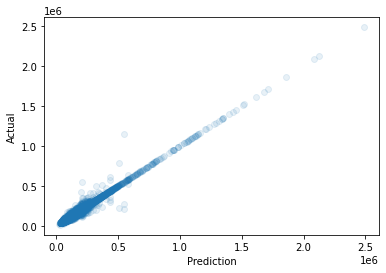

In [38]:
plt.plot(dtree.predict(vect),Y,'o',alpha=.1)
plt.xlabel("Prediction")
plt.ylabel("Actual")

In [39]:
from sklearn import model_selection

gm = model_selection.GridSearchCV(m, {'max_depth':[None,2,3,4,6,8,10,15,20]},scoring='r2')
gres = gm.fit(vect,Y)

In [40]:
gres.best_score_

-0.3392311674563865

In [41]:
gres.best_params_

{'max_depth': 10}

In [42]:
from IPython.display import Image  
import io, pydotplus as pydot
dot_data = io.StringIO() 
tree.export_graphviz(gres.best_estimator_, out_file=dot_data,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

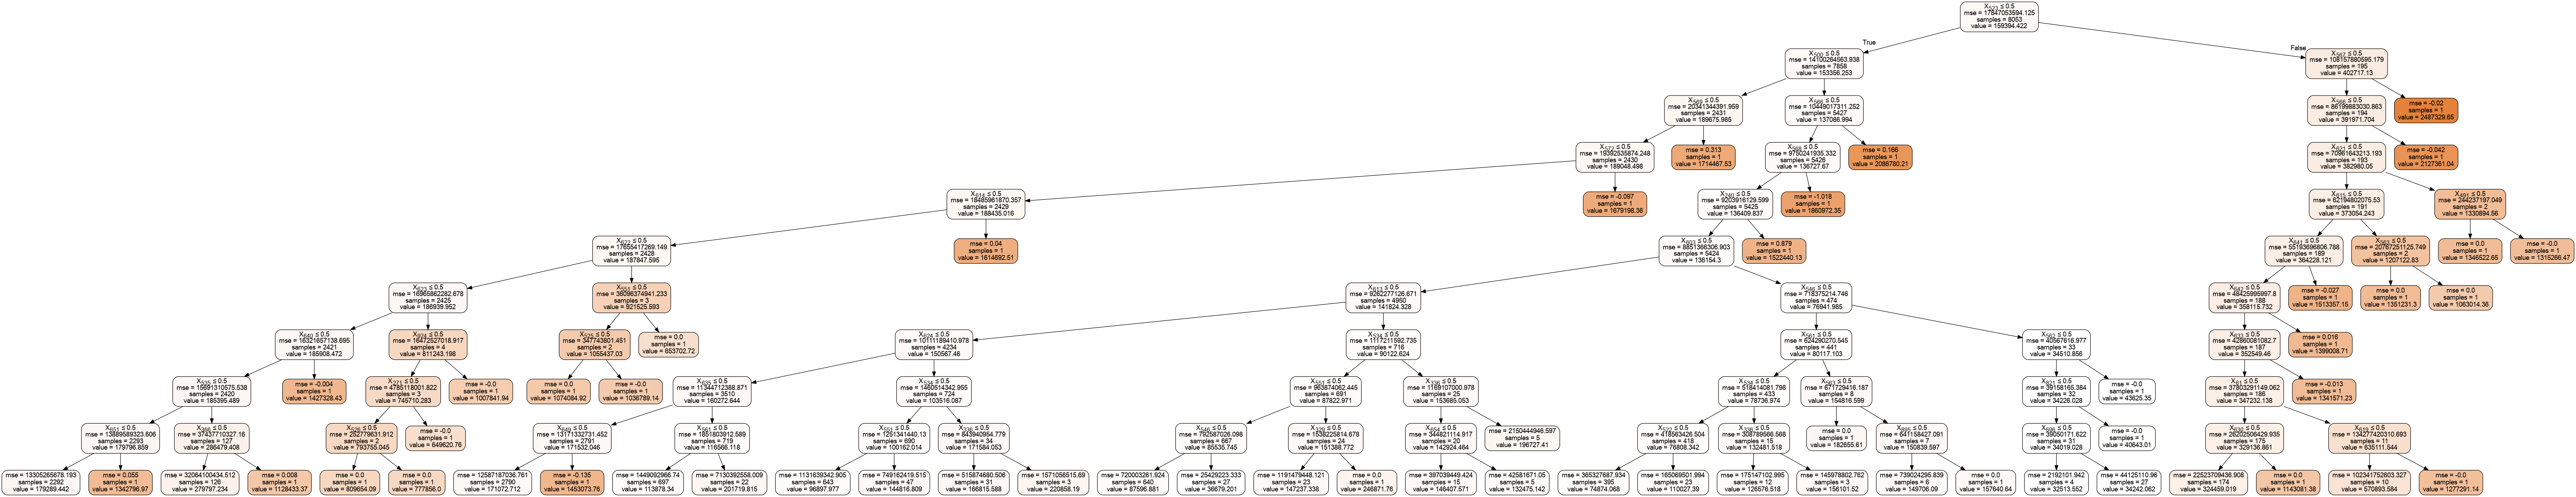

In [43]:
Image(graph.create_png())  

In [44]:
dvec.get_feature_names()[523]

'Facility ID=1139.0'

In [45]:
dvec.get_feature_names()[406]

'Attending Provider License Number=266425.0'

In [46]:
diagcodes

{(1, 'Tuberculosis'),
 (2, 'Septicemia (except in labor)'),
 (3, 'Bacterial infection; unspecified site'),
 (4, 'Mycoses'),
 (5, 'HIV infection'),
 (6, 'Hepatitis'),
 (7, 'Viral infection'),
 (8, 'Other infections; including parasitic'),
 (9, 'Sexually transmitted infections (not HIV or hepatitis)'),
 (10, 'Immunizations and screening for infectious disease'),
 (11, 'Cancer of head and neck'),
 (12, 'Cancer of esophagus'),
 (13, 'Cancer of stomach'),
 (14, 'Cancer of colon'),
 (15, 'Cancer of rectum and anus'),
 (16, 'Cancer of liver and intrahepatic bile duct'),
 (17, 'Cancer of pancreas'),
 (18, 'Cancer of other GI organs; peritoneum'),
 (19, 'Cancer of bronchus; lung'),
 (20, 'Cancer; other respiratory and intrathoracic'),
 (21, 'Cancer of bone and connective tissue'),
 (22, 'Melanomas of skin'),
 (23, 'Other non-epithelial cancer of skin'),
 (24, 'Cancer of breast'),
 (25, 'Cancer of uterus'),
 (26, 'Cancer of cervix'),
 (27, 'Cancer of ovary'),
 (28, 'Cancer of other female genita

In [47]:
forest = ensemble.RandomForestRegressor()
m = forest.fit(vect,Y)

In [48]:
metrics.r2_score(m.predict(vect),Y)

0.8791070522835902

In [49]:
gm = model_selection.GridSearchCV(m, {'max_depth':[None,2,3,4,6,8,10,15,20]},scoring='r2')
gres = gm.fit(vect,Y)

In [50]:
gres.best_score_

-0.1783000620269145

In [51]:
gres.best_params_

{'max_depth': None}

In [52]:
gres.best_estimator_.feature_importances_.argmax()

523

In [53]:
dvec.get_feature_names()[137]

'Attending Provider License Number=181950.0'